In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('/Users/isabellakleckner/Downloads/minute_weather.csv') 

              rowID  air_pressure      air_temp  avg_wind_direction  \
count  1.587257e+06  1.587257e+06  1.587257e+06        1.586824e+06   
mean   7.936280e+05  9.168301e+02  6.185144e+01        1.619654e+02   
std    4.582018e+05  3.051593e+00  1.183362e+01        9.520812e+01   
min    0.000000e+00  9.050000e+02  3.164000e+01        0.000000e+00   
25%    3.968140e+05  9.148000e+02  5.270000e+01        6.200000e+01   
50%    7.936280e+05  9.167000e+02  6.224000e+01        1.820000e+02   
75%    1.190442e+06  9.187000e+02  7.088000e+01        2.170000e+02   
max    1.587256e+06  9.295000e+02  9.950000e+01        3.590000e+02   

       avg_wind_speed  max_wind_direction  max_wind_speed  min_wind_direction  \
count    1.586824e+06        1.586824e+06    1.586824e+06        1.586824e+06   
mean     2.774272e+00        1.634030e+02    3.399813e+00        1.668264e+02   
std      2.060758e+00        9.236723e+01    2.423167e+00        9.746275e+01   
min      0.000000e+00        0.00000

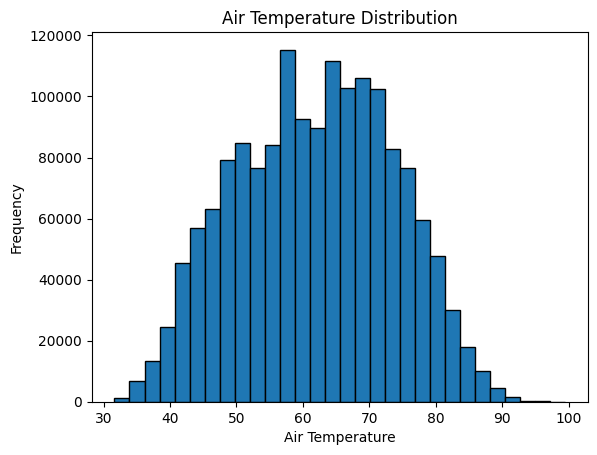

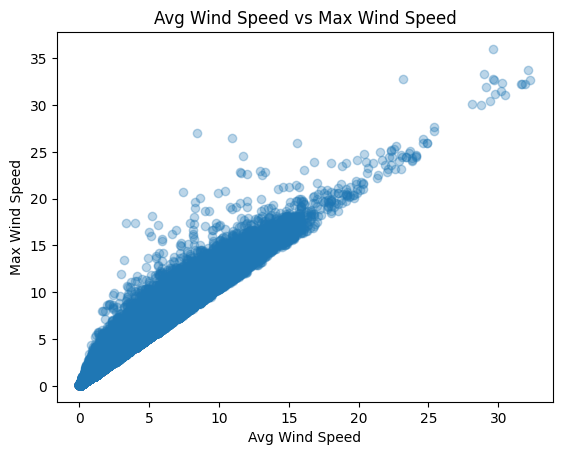

In [25]:
print(df.describe())

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Histogram of air temperature
plt.hist(df['air_temp'], bins=30, edgecolor='black')
plt.title('Air Temperature Distribution')
plt.xlabel('Air Temperature')
plt.ylabel('Frequency')
plt.show()

# Scatter plot between avg_wind_speed and max_wind_speed
plt.scatter(df['avg_wind_speed'], df['max_wind_speed'], alpha=0.3)
plt.title('Avg Wind Speed vs Max Wind Speed')
plt.xlabel('Avg Wind Speed')
plt.ylabel('Max Wind Speed')
plt.show()

In [26]:
#PRE-PROCESSING
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [27]:
columns_to_use = [
    'air_pressure', 'air_temp', 'avg_wind_speed', 'max_wind_speed', 
    'min_wind_speed', 'rain_accumulation', 'rain_duration', 'relative_humidity'
]

# Drop rows with too many missing values
df_filtered = df[columns_to_use]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_filtered), columns=columns_to_use)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed)
df_scaled = pd.DataFrame(scaled_data, columns=columns_to_use)

In [28]:
#MODELING
from sklearn.cluster import KMeans

# K-Means clustering with 4 clusters 
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = kmeans.fit_predict(df_scaled)

# Add cluster labels
df['KMeans_Cluster'] = kmeans_clusters 

# Summary of K-Means clustering
print("K-Means Cluster Centers:")
print(kmeans.cluster_centers_)
print("\nCluster Sizes (K-Means):")
print(df['KMeans_Cluster'].value_counts())

/Users/isabellakleckner/anaconda3/envs/homework/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-Means Cluster Centers:
[[-1.59412355e-01 -3.01109441e-01  1.59440265e+00  1.56364298e+00
   1.57399230e+00 -1.00935223e-03  5.10016207e-03  4.07914238e-02]
 [ 1.86688651e-01  6.38139753e-01 -4.63993714e-01 -4.56789168e-01
  -4.53789715e-01 -1.84780989e-03 -5.58667429e-03 -6.26067590e-01]
 [-2.17357652e-01 -9.17893903e-01 -3.19472396e-01 -3.10204607e-01
  -3.22960355e-01 -1.51914239e-03  1.30481708e-03  1.08321587e+00]
 [-1.40951565e-01 -1.04062867e-01  7.40473513e-01  7.01734045e-01
   7.54606999e-01  6.27600280e+02  5.63589815e+02  9.02793494e-02]]

Cluster Sizes (K-Means):
KMeans_Cluster
1    807540
2    453625
0    326088
3         4
Name: count, dtype: int64


In [29]:
cluster_3_data = df[df['KMeans_Cluster'] == 3]
print(cluster_3_data)

           rowID     hpwren_timestamp  air_pressure  air_temp  \
1128011  1128011  2013-10-10 09:40:47         915.7     47.30   
1366704  1366704  2014-04-10 16:32:16         916.5     77.36   
1393549  1393549  2014-04-29 08:43:49         918.3     67.82   
1426529  1426529  2014-05-22 06:38:18         915.1     50.00   

         avg_wind_direction  avg_wind_speed  max_wind_direction  \
1128011               181.0             3.0               190.0   
1366704               259.0             2.0               279.0   
1393549                47.0            11.2                63.0   
1426529               163.0             1.0               183.0   

         max_wind_speed  min_wind_direction  min_wind_speed  \
1128011             3.5               173.0             2.5   
1366704             2.2               245.0             1.6   
1393549            13.4                36.0             9.0   
1426529             1.3               137.0             0.7   

         rain_accumula

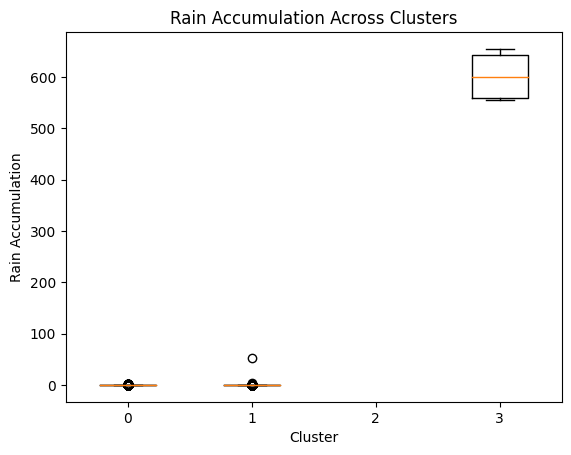

In [32]:
import matplotlib.pyplot as plt

plt.boxplot([df[df['KMeans_Cluster'] == i]['rain_accumulation'] for i in range(4)])
plt.xticks(ticks=range(1, 5), labels=['0', '1', '2', '3'])
plt.title("Rain Accumulation Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Rain Accumulation")
plt.show()

Cluster Centers (Standardized):
[[-1.59412355e-01 -3.01109441e-01  1.59440265e+00  1.56364298e+00
   1.57399230e+00 -1.00935223e-03  5.10016207e-03  4.07914238e-02]
 [ 1.86688651e-01  6.38139753e-01 -4.63993714e-01 -4.56789168e-01
  -4.53789715e-01 -1.84780989e-03 -5.58667429e-03 -6.26067590e-01]
 [-2.17357652e-01 -9.17893903e-01 -3.19472396e-01 -3.10204607e-01
  -3.22960355e-01 -1.51914239e-03  1.30481708e-03  1.08321587e+00]
 [-1.40951565e-01 -1.04062867e-01  7.40473513e-01  7.01734045e-01
   7.54606999e-01  6.27600280e+02  5.63589815e+02  9.02793494e-02]]


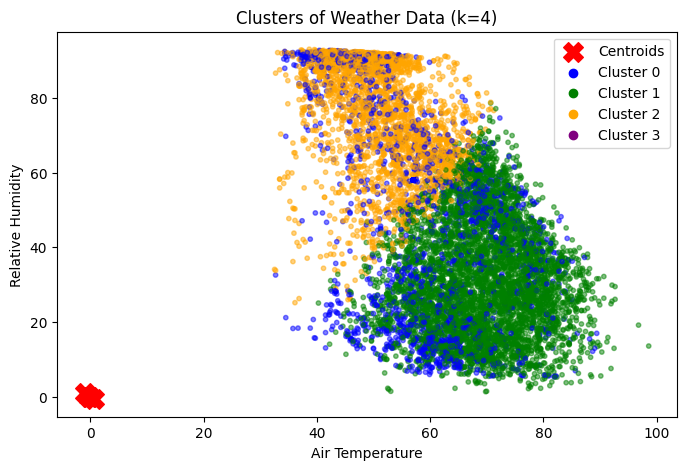

In [38]:
#STORYTELLING
print("Cluster Centers (Standardized):")
print(kmeans.cluster_centers_)


# Sample 10,000 data points
sampled_df = df.sample(10000, random_state=42)

# features used in clustering
feature_names = ['air_pressure', 'air_temp', 'avg_wind_speed', 'max_wind_speed', 
                 'min_wind_speed', 'rain_accumulation', 'rain_duration', 'relative_humidity']

air_temp_index = feature_names.index('air_temp')
relative_humidity_index = feature_names.index('relative_humidity')

# custom colors for clusters
custom_colors = {0: 'blue', 1: 'green', 2: 'orange', 3: 'purple'}
colors = sampled_df['KMeans_Cluster'].map(custom_colors)  

# Scatter plot with cluster centers
plt.figure(figsize=(8, 5))
plt.scatter(sampled_df['air_temp'], sampled_df['relative_humidity'], 
            c=colors, s=10, alpha=0.5)  
plt.scatter(kmeans.cluster_centers_[:, air_temp_index],
            kmeans.cluster_centers_[:, relative_humidity_index],
            c='red', s=200, label='Centroids', marker='X')
for cluster_id, color in custom_colors.items():
    plt.scatter([], [], c=color, label=f'Cluster {cluster_id}')
plt.title(f'Clusters of Weather Data (k={kmeans.n_clusters})')
plt.xlabel('Air Temperature')
plt.ylabel('Relative Humidity')
plt.legend()
plt.show()

